In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten

In [ ]:
# Load your air quality dataset (replace 'your_dataset.csv' with your actual file)
data = pd.read_csv('/content/waste_air_quality_measurement.csv')

In [ ]:
data

In [ ]:
# Preprocess the data
# Assuming your dataset has columns like 'temperature', 'humidity', 'pollution_level', etc.
# Adjust the columns based on your dataset
features = data[['Temperature', 'Humidity', 'WindSpeed']]
labels = data['AQI']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Reshape the data for CNN input (assuming you have a time series)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

#####relu
#####Conv1D, MaxPoolingmm
#####optimizer adam
#####LSTM
#####Mean Squared on dataset
#####r- squared
#####Explained variance score

In [ ]:
# Build the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))  # Adjust the number of neurons based on your problem

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse')  # Adjust the optimizer and loss based on your problem

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {loss}')

# Make predictions
predictions = model.predict(X_test)

# You can further analyze and visualize the predictions based on your needs


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 6168.7246 - val_loss: 5959.0825
Epoch 2/10
1/1 [==============================] - 0s 39ms/step - loss: 6167.3804 - val_loss: 5957.7280
Epoch 3/10
1/1 [==============================] - 0s 40ms/step - loss: 6166.1465 - val_loss: 5956.4341
Epoch 4/10
1/1 [==============================] - 0s 60ms/step - loss: 6164.9624 - val_loss: 5955.1704
Epoch 5/10
1/1 [==============================] - 0s 78ms/step - loss: 6163.8306 - val_loss: 5953.9478
Epoch 6/10
1/1 [==============================] - 0s 62ms/step - loss: 6162.7246 - val_loss: 5952.7915
Epoch 7/10
1/1 [==============================] - 0s 55ms/step - loss: 6161.6738 - val_loss: 5951.7266
Epoch 8/10
1/1 [==============================] - 0s 57ms/step - loss: 6160.7148 - val_loss: 5950.6758
Epoch 9/10
1/1 [==============================] - 0s 69ms/step - loss: 6159.7500 - val_loss: 5949.5923
Epoch 10/10
1/1 [==============================] - 0s 35ms/step - loss: 594

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Assuming 'y_test' and 'predictions' are the true labels and predicted values from your model
# Also assuming you have calculated other evaluation metrics like MAE, RMSE, etc.

# Calculate additional evaluation metrics
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
explained_variance = explained_variance_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Explained Variance: {explained_variance}')

Mean Absolute Error: 76.26988481357694
Root Mean Squared Error: 77.12631503602572
Mean Squared Error: 5948.468471036285
R-squared: -44.44670308941134
Explained Variance: -0.003699723293648871


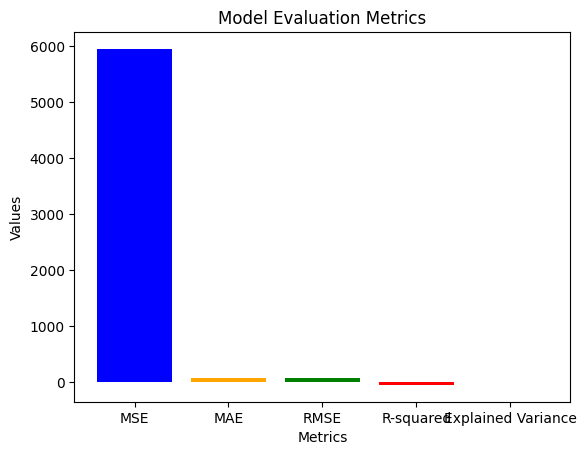

In [ ]:
# Create a bar graph
metrics_names = ['MSE', 'MAE', 'RMSE', 'R-squared', 'Explained Variance']
metrics_values = [mse, mae, rmse, r2, explained_variance]

plt.bar(metrics_names, metrics_values, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

#Random Forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Define the model
model = RandomForestRegressor()

# Define hyperparameters to search through
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Ensure that the data is two-dimensional
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))  # Add this line
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))  # Add this line

In [ ]:
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [ ]:
# Train the model with the best hyperparameters
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)

# Make predictions
predictions = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
explained_variance = explained_variance_score(y_test, predictions)

# Print the updated metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
print(f'Explained Variance: {explained_variance}')

Mean Squared Error: 131.20628373662547
Mean Absolute Error: 10.918888888888882
Root Mean Squared Error: 11.45453114433871
R-squared: -0.0024249181915356743
Explained Variance: 0.01793305908738374


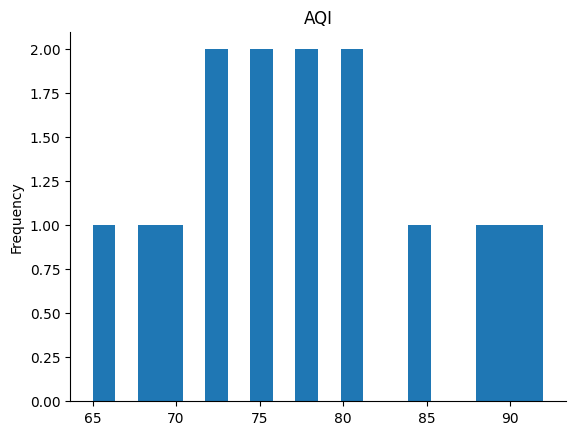

In [ ]:
from matplotlib import pyplot as plt
data['AQI'].plot(kind='hist', bins=20, title='AQI')
plt.gca().spines[['top', 'right',]].set_visible(False)

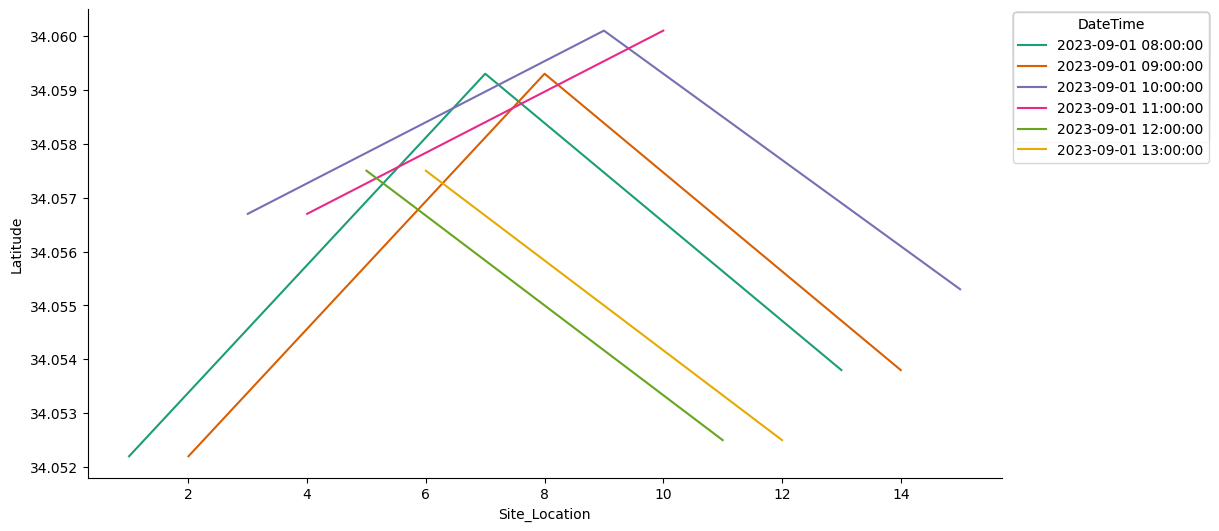

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Site_Location']
  ys = series['Latitude']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Site_Location', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('DateTime')):
  _plot_series(series, series_name, i)
  fig.legend(title='DateTime', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Site_Location')
_ = plt.ylabel('Latitude')

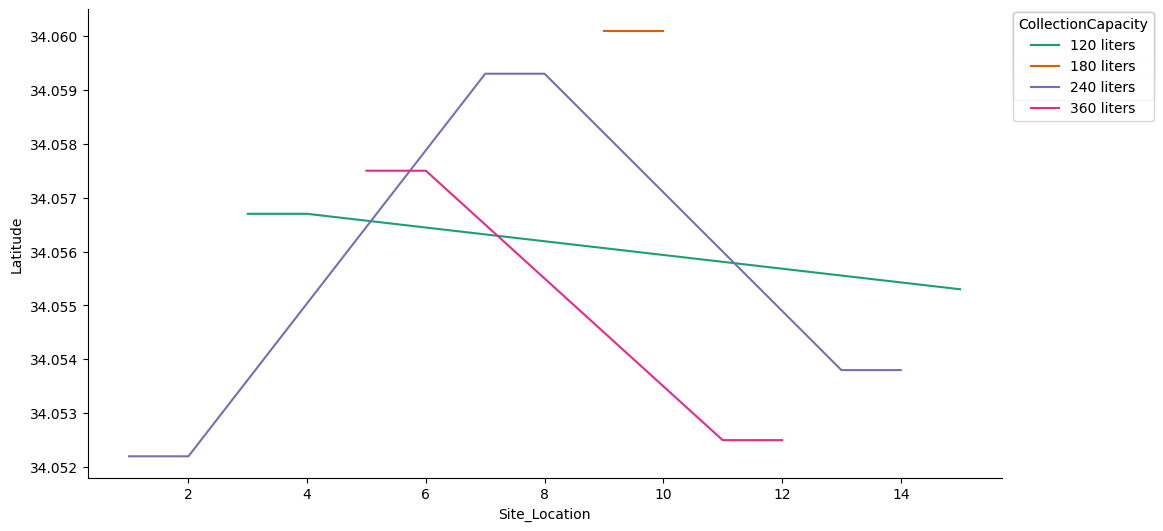

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Site_Location']
  ys = series['Latitude']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Site_Location', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('CollectionCapacity')):
  _plot_series(series, series_name, i)
  fig.legend(title='CollectionCapacity', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Site_Location')
_ = plt.ylabel('Latitude')

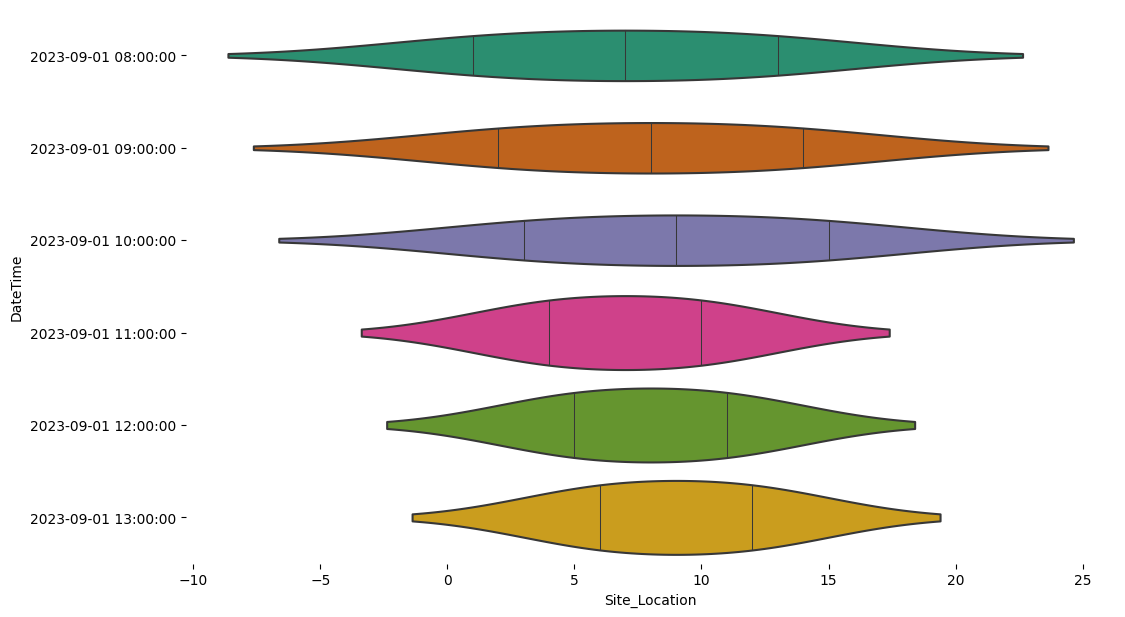

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['DateTime'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Site_Location', y='DateTime', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

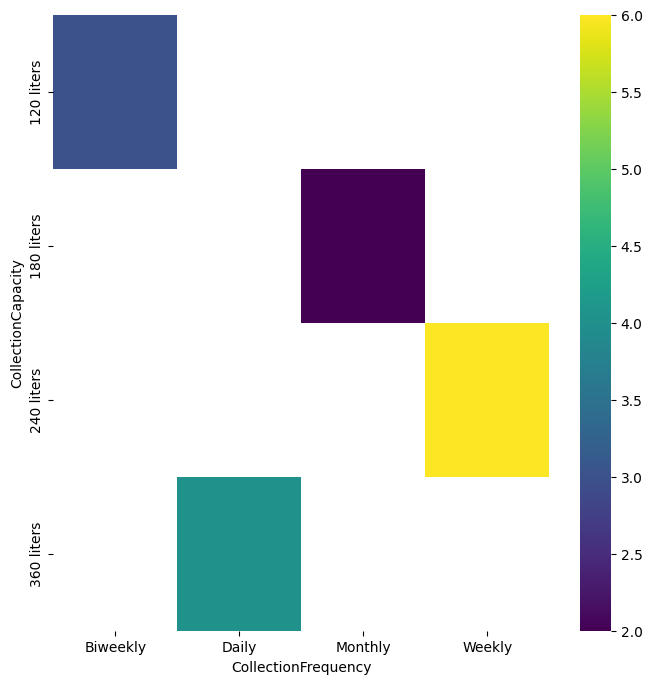

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['CollectionCapacity'].value_counts()
    for x_label, grp in data.groupby('CollectionFrequency')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('CollectionFrequency')
_ = plt.ylabel('CollectionCapacity')